In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Simulation

Generate 1000 samples from two different classes of equal size
1. 500 samples from class 1 are generated here.

In [ ]:
Number_of_points = 1000

mean = [-2.5, -2.5]

cov = [[1, 0], [0, 1]]

X_data = np.random.multivariate_normal(mean, cov, Number_of_points//2)
# print(X_data)
print(X_data.shape)

(500, 2)


2. A set of 500 samples from class 2 are generted here, by changing the mean of the cluster

In [ ]:
mean = [2.5,2.5]
# Create samples from class 2 with the above mean. Concatenate the samples from class 1 and class 2.
X_data = np.concatenate((X_data,np.random.multivariate_normal(mean, cov, Number_of_points//2)))

## Add class to the points generated
Y_data = np.zeros((Number_of_points,))
Y_data[Number_of_points//2:] = 1

## Training and Test Set Creation

In [ ]:
Number_of_training = int(Number_of_points*0.8)

Number_of_testing = int(Number_of_points*0.2)

## Randomly permute a sequence, or return a permuted range
index = np.random.permutation(Number_of_points)

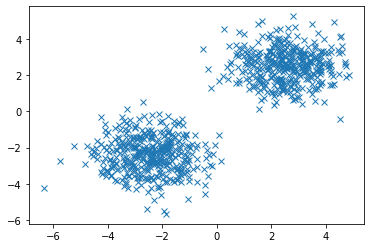

(800, 2) (800,)


In [ ]:
X_train = X_data[index[:Number_of_training]] 

Y_train = Y_data[index[:Number_of_training]]

## Plots the points generated
plt.plot(X_train[:,0],X_train[:,1],'x')

plt.show()

print(X_train.shape,Y_train.shape)

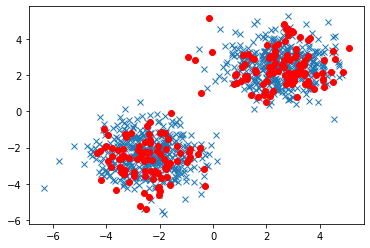

In [ ]:
X_test = X_data[index[Number_of_training:]]

Y_test = Y_data[index[Number_of_training:]]

## Plot train and test points in the same plot
plt.plot(X_train[:,0],X_train[:,1],'x')
## Add parameters for test points
plt.plot(X_test[:,0],X_test[:,1],'o',color='red')

plt.show()

## Learning a logisitc regression classifier

In [ ]:
# Import library
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
## ## Please note the default values e.g L-2  regularization by default
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)

print("Accuracy on training data: %f"%(clf.score(X_train, Y_train)))

print("Accuracy on test data: %f"%(clf.score(X_test, Y_test)))

Accuracy on training data: 1.000000
Accuracy on test data: 1.000000


### Visualizing the decision boundary

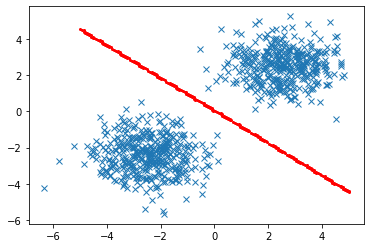

In [ ]:
eps = 0.0289
plt.plot(X_train[:,0],X_train[:,1],'x')

for i in np.linspace(-5,5,150):
    for j in np.linspace(-5,5,150):
        pred = clf.predict_proba([[i,j]])[0]
        if pred[0] >=  0.5 - eps and pred[0] <=0.5 + eps and pred[1] >=  0.5 - eps and pred[1] <=0.5+eps:
            plt.plot(i,j,'o',color = 'red',markersize=2)
    
plt.show()
        

## Iris Dataset - Multiclass Classification

In [ ]:

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y)
print(list(load_iris().target_names))


(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa', 'versicolor', 'virginica']


In [ ]:
## Create a model for Logistic Regression as done above
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200).fit(X,y)

print(clf.predict(X[:2, :]))
## predict_proba gives the probability estimates
print(clf.predict_proba(X[:1, :])) 
print(clf.score(X, y))

[0 0]
[[9.81583143e-01 1.84168427e-02 1.45011486e-08]]
0.9733333333333334


In [ ]:
new_observation = [[.5, .5, .5, .5]]
print(clf.predict(new_observation))
print(clf.predict_proba(new_observation))

[0]
[[9.98575782e-01 1.42420748e-03 1.00555016e-08]]


## Digits dataset - Multiclass Classification

In [ ]:
from sklearn.datasets import load_digits
## Each image is of size 8 X 8
digits = load_digits()

In [ ]:
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


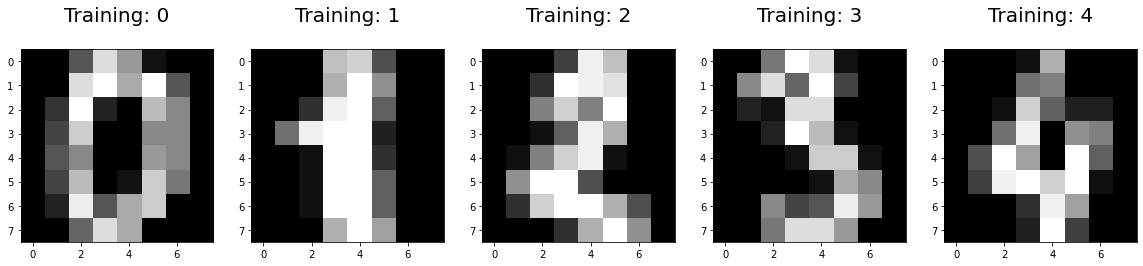

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
## Create a train test split with test size 75-25 split.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


##### Hyperparameter Tuning - Method *1*

In [ ]:
## Method 1 
C = [0.0001, 0.1, 0.5]
for each_C in C:
  logisticRegr = LogisticRegression(C = each_C)
  logisticRegr.fit(x_train, y_train)
  score = logisticRegr.score(x_val, y_val)
  print("For C value {}, the score obtained is {}".format(each_C, score))




For C value 0.0001, the score obtained is 0.9305555555555556
For C value 0.1, the score obtained is 0.9791666666666666
For C value 0.5, the score obtained is 0.9791666666666666


In [ ]:
logisticRegr = LogisticRegression(C = 0.1)
logisticRegr.fit(x_train, y_train)
test_score = logisticRegr.score(x_test, y_test)
print(test_score)

0.9694444444444444


##### Hyperparameter tuning - Method 2 - Grid Search CV

In [ ]:
## Method 2
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs'], 'penalty':['l1', 'l2'], 'max_iter':[100, 500], 'C':[0.01, 0.1]}
logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.9583333333333334


Text(0.5, 15.0, 'Predicted')

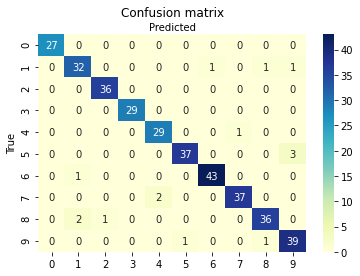

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = list(range(10))
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')